In [18]:
import numpy as np 
import matplotlib.pyplot as plt

import sys
sys.path.append('../../src/')
from li_stephens import *

import scipy as sp
from tqdm import tqdm
from glob import glob

import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices

from scipy.stats import linregress

%matplotlib inline
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
def plot_yx(ax, **kwargs):
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    # now plot both limits against eachother
    ax.plot(lims, lims, **kwargs)
    
# Deboxing a particular axis
def debox(ax):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)


# Verifying when using Uniform Maps

Text(0.5, 1.0, '20 Mb,r = $10^{-8}$')

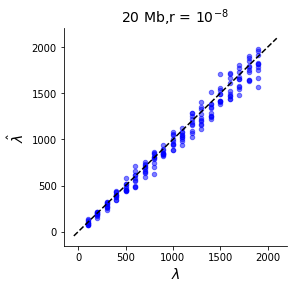

In [27]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
file_pat = '../../../data/hap_copying/full_sim_results_unif/SerialConstant/*.npz'
true_scales_uniform = []
scales_hat_uniform = []
for g in sorted(glob(file_pat)):
    x = np.load(g)
    ax.scatter(x['true_scales'], x['scales_hat'], color='blue', alpha=0.5, s=20)
    true_scales_uniform.append(x['true_scales'])
    scales_hat_uniform.append(x['scales_hat'])
    
plot_yx(ax, linestyle='--', color='black')
ax.set_ylabel(r'$\hat{\lambda}$', fontsize=14)
ax.set_xlabel(r'$\lambda$', fontsize=14)
# ax.set_xscale('log')
# ax.set_yscale('log')
debox(ax);
ax.set_title(r'20 Mb,r = $10^{-8}$', fontsize=14)

In [28]:
scales_dict_uniform = {'scales_true': np.concatenate(true_scales_uniform), 
     'scales_hat' : np.concatenate(scales_hat_uniform)}

scale_df_uniform = pd.DataFrame(scales_dict_uniform)
y, X = dmatrices('scales_hat ~ scales_true', data=scale_df_uniform, return_type='dataframe')
mod = sm.OLS(y,X)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             scales_hat   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     9471.
Date:                Thu, 20 Aug 2020   Prob (F-statistic):          9.05e-163
Time:                        14:55:16   Log-Likelihood:                -1088.9
No. Observations:                 190   AIC:                             2182.
Df Residuals:                     188   BIC:                             2188.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.1110     11.325     -0.010      0.992     -22.451      22.229
scales_true     0.9666      0.010     97.318      0.000       0.947       0.986
==============================================================================
Omnibus:                        5.393   Durbin-Watson:                   1.185
Prob(Omnibus):                  0.067   Jarque-Bera (JB):                6.634
Skew:                           0.182   Prob(JB):                       0.0363
Kurtosis:                       3.840   Cond. No.                     2.37e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Verifying when using actual recombination map (chr22 - deCODE)

Text(0.5, 1.0, 'Jump-Rate Inference (chr22: deCODE)')

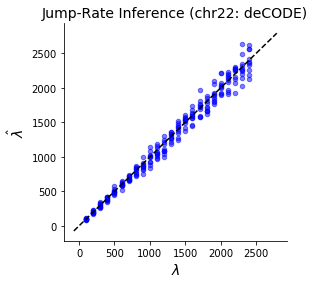

In [29]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
file_pat = '../../../data/hap_copying/real_chrom_sims/results/chr22_deCODE.n100.scale_100_2500.seed*.rep0.npz'
true_scales_chr22 = []
scales_hat_chr22 = []
for g in sorted(glob(file_pat)):
    x = np.load(g)
    ax.scatter(x['true_scales'], x['scales_hat'], color='blue', alpha=0.5, s=20)
    true_scales_chr22.append(x['true_scales'])
    scales_hat_chr22.append(x['scales_hat'])
    
plot_yx(ax, linestyle='--', color='black')
ax.set_ylabel(r'$\hat{\lambda}$', fontsize=14)
ax.set_xlabel(r'$\lambda$', fontsize=14)
# ax.set_xscale('log')
# ax.set_yscale('log')
debox(ax);
ax.set_title(r'Jump-Rate Inference (chr22: deCODE)', fontsize=14)
# plt.savefig('../../../sandbox/verify_hap_copying_real_genmap.pdf', dpi=300, bbox_inches='tight')

In [31]:
scales_dict_chr22 = {'scales_true': np.concatenate(true_scales_chr22), 
     'scales_hat' : np.concatenate(scales_hat_chr22)}

scale_df_chr22 = pd.DataFrame(scales_dict_chr22)

y, X = dmatrices('scales_hat ~ scales_true', data=scale_df_chr22, return_type='dataframe')
mod = sm.OLS(y,X)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             scales_hat   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 1.498e+04
Date:                Thu, 20 Aug 2020   Prob (F-statistic):          6.87e-217
Time:                        14:56:09   Log-Likelihood:                -1413.1
No. Observations:                 240   AIC:                             2830.
Df Residuals:                     238   BIC:                             2837.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -10.4204     11.675     -0.893      0.373     -33.419      12.578
scales_true     0.9999      0.008    122.383      0.000       0.984       1.016
==============================================================================
Omnibus:                       12.096   Durbin-Watson:                   1.547
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               26.866
Skew:                           0.117   Prob(JB):                     1.47e-06
Kurtosis:                       4.622   Cond. No.                     2.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

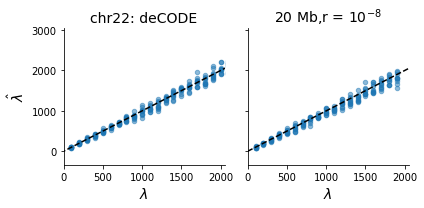

In [42]:
fig, ax = plt.subplots(1,2,figsize=(6,3), sharex=True, sharey=True)

ax[0].scatter(scale_df_chr22['scales_true'], 
              scale_df_chr22['scales_hat'], s=20, alpha=0.5)
plot_yx(ax[0], color='black', linestyle='--')
debox(ax[0]);
ax[0].set_title(r'chr22: deCODE', fontsize=14)


ax[1].scatter(scale_df_uniform['scales_true'], 
              scale_df_uniform['scales_hat'],s=20, alpha=0.5)
plot_yx(ax[1], color='black', linestyle='--')
debox(ax[1])
ax[1].set_title(r'20 Mb,r = $10^{-8}$', fontsize=14)
ax[0].set_xlim(0,2050)

ax[0].set_ylabel(r'$\hat{\lambda}$', fontsize=14)
ax[0].set_xlabel(r'$\lambda$', fontsize=14)
ax[1].set_xlabel(r'$\lambda$', fontsize=14)

plt.tight_layout()
plt.savefig('../../../sandbox/verify_ls_model.pdf', dpi=300, bbox_inches='tight')

# Testing Jump Rate Inference with Different $K$ in the panel

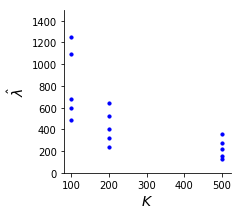

In [52]:
file_pat = '../../../data/hap_copying/mle_results/SerialConstant/mle_scale_*_1_10_20_Ne10000_*.scale.npz'

fig, ax = plt.subplots(1,1,figsize=(3,3))
for f in sorted(glob(file_pat)):
    df = np.load(f)
    npanel = df['model_params'][0]
    scale = df['scale']
    ax.scatter(npanel, scale, s=10, color='blue')
    
debox(ax);
ax.set_xlabel(r'$K$', fontsize=14)
ax.set_ylabel(r'$\hat{\lambda}$', fontsize=14)
ax.set_ylim(0,1500);
plt.savefig('../../../sandbox/lambda_hat_w_K.pdf', dpi=300, bbox_inches='tight')